In [ ]:
# Name: Bitha SK
# PHYS 244 Github Clustering Assignment

# Data source : pysc_data.txt from Shivam


#......................................................
# Description : 

# 1. Created a pandas dataframe
# 2. Visualized the data with scatterplot
# 3. Determiend optimal number of clusters, and 
#    Applied K-means clustering 
#......................................................


In [129]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

import matplotlib.pylab as plt


from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# Create Pandas dataframe

In [130]:
columnNames = ['X','Y']

In [131]:
df_SivamsData = pd.read_table('pysc_data.txt', sep = ",",comment='#',header=0,names = columnNames) #delim_whitespace=True

#'pysc_data.txt'
#dataset_git.txt

In [132]:
df_SivamsData.head()

,X,Y
0,21.834044,-9.174932
1,23.440649,-10.008110
2,23.000229,-8.533631
3,24.604665,-9.996657
4,25.293512,-10.086594


In [133]:
x = df_SivamsData['X']
y = df_SivamsData['Y']


# Visualize data

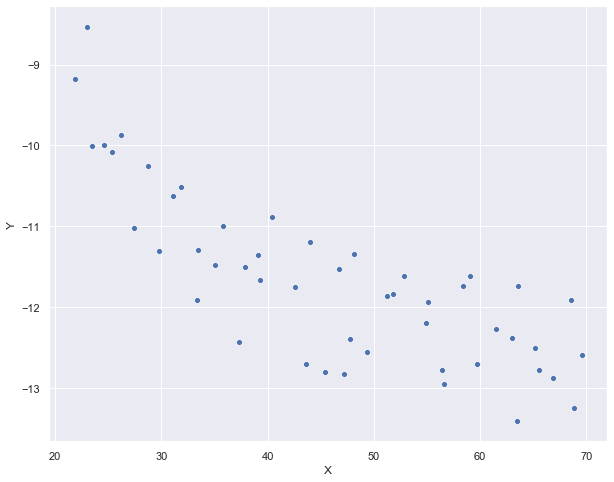

In [134]:
fig1 = plt.figure(figsize=(10,8))
sns.scatterplot(df_SivamsData['X'],df_SivamsData['Y'])

plt.show()

In [ ]:
# Create kde plot

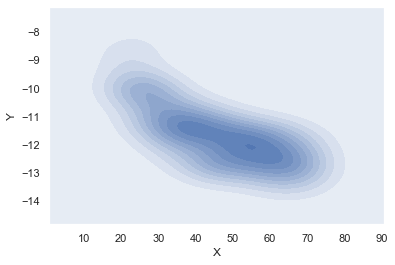

In [139]:
ax = sns.kdeplot(x, y, shade=True)

# Determine the optimal number of clusters 

In [35]:
# determine the optimal number of clusters 

# use the elbow method:

    # Train multiple models
    # Use different number of clusters for each model
    # Store "inertia_" property (WCSS) for each instance
    
    # WCSS = Within Cluster Sum of Squares

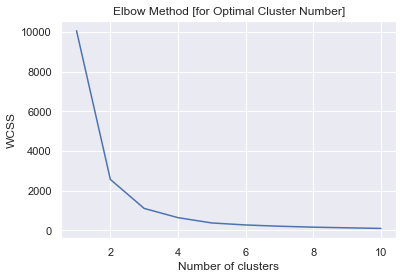

In [140]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_SivamsData)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method [for Optimal Cluster Number]')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Bend in the curve indicates the optimal number of clusters

# number of clusters = either 2 or 3

In [ ]:
#Source:

# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203\n"

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html\n"

# Apply K-means clustering

In [136]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_SivamsData)

kmeans.labels_



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [69]:
#kmeans.predict([[0, 0], [12, 3]])

In [137]:
kmeans.cluster_centers_

array([[ 62.13363075, -12.44991324],
       [ 28.71475525, -10.47301101],
       [ 44.96732067, -11.89890546]])

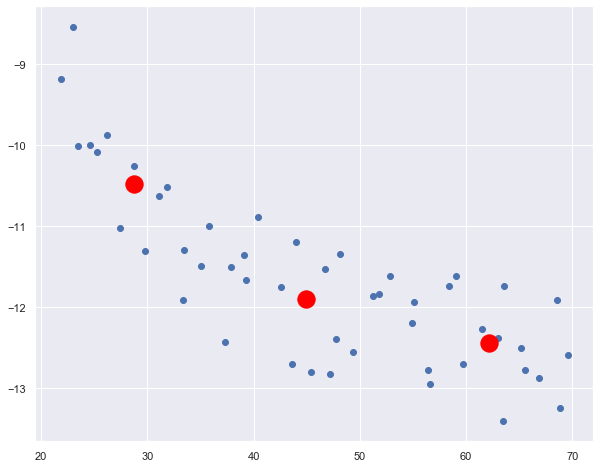

In [138]:
fig1 = plt.figure(figsize=(10,8))

plt.scatter(x, y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()